In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Hypothesis Testing

In Data8.2x, you have been using simulation to conduct hypothesis testing. Now that we have completed Data8.2x, this is a good time to take a step back and reflect on hypothesis testing. 

Every hypothesis test has roughly the same structure. The following 4 steps provide a rough outline:

1) State the null and alternate hypotheses. Generally, the alternate hypothesis is what you are trying to show. Essentially, if you want to show a result, we assume the opposite is true and try to prove ourselves wrong. 

2) Determine/calculate a test statistic. See your book for a formal definition, but generally, the test statistic is any quantity that helps us evaluate our sample with respect to our null hypothesis. 

3) Determine distribution of test statistic and compute a $p$-value. If you have taken inferential statistics before, you likely computed a $z$ or $t$ statistic and used a calculator or table to compute a $p$-value. This is based on asymptotic theory of sample means/proportions. This is not the approach taken in Data8.2x. With better computing power, we can use simulation to obtain an empirical distribution of our test statistic under the null hypothesis. 

4) Conclude. For low $p$-value (generally below 0.05), we reject the null hypothesis. For high $p$-value, we fail to reject. Low $p$-value implies that our sample would be very unusual if the null hypothesis were actually true. Therefore, that is evidence that the null hypothesis is wrong. 

### Example

Let's work through an example. Suppose that in the upcoming election, Referendum A is up for approval in Colorado. You suspect that in El Paso County, more than half of eligible voters support the referendum. You collect a random sample of 200 eligible voters in El Paso County and 115 of them express support. Is there evidence to conclude that supports your suspicion? 

#### Step 1: Hypothesis

State the null and alternative hypotheses.

Null: Not more than half support the referendum.

Alternative: More than half support it.

#### Step 2: Test Statistic

Select a test statistic and compute that test statistic for the sample.

The test statistic will be the number that support the referendum.

#### Step 3: $p$-value

3a) If $H_0$ were true, what should the value of $\hat{p}$ be close to? In other words, if in fact, half of eligible voters support the referendum, what value should your test statistic take? 

the value of p should be 0.5

3b) In words (and in the context of this problem), describe what the $p$-value is. 

The p value is the percentage of the time that the alternative or weirder would be seen in the test statistic.

3c) Find the $p$-value directly and using simulation. Hint: the binomial distribution will be of use here. 

(array([  23.,  158.,  735., 1731., 2677., 2480., 1489.,  581.,  113.,
          13.]),
 array([0.375 , 0.4005, 0.426 , 0.4515, 0.477 , 0.5025, 0.528 , 0.5535,
        0.579 , 0.6045, 0.63  ]),
 <a list of 10 Patch objects>)

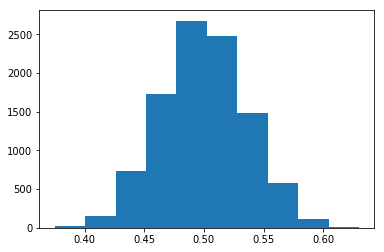

In [57]:
rvs = make_array()
for each in np.arange(0,10000):
    rvs = np.append(rvs,stats.binom.rvs(1,.5,size=200).sum()/200)
plt.hist(rvs)

In [59]:
np.mean(rvs>=115/200)

0.0193

#### Step 4: Conclude

What is your conclusion? Be sure to state your conclusion in the context of the problem.

Reject the null hypothesis. It is likely that most voters do support referendum A.

## Confidence Intervals

Construct and interpret a 95% confidence interval on $p$, the true proportion of eligible El Paso County voters who support the referendum. There are many ways to construct such an interval (bootstrap, the binomial distribution, asymptotically). Select one and implement. 

Also, compare your interval to the results of your hypothesis test. Does your interval contain the value 0.5? Why does that matter? 

In [56]:
print(percentile(2.5, rvs))
print(percentile(97.5, rvs))

86.0
114.0


Yes it does contain 0.5, if it didnt, it wouldnt accurately represent the null hypothesis which was that 50 percent of voters favored the amendment and 50 percent didnt.